1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

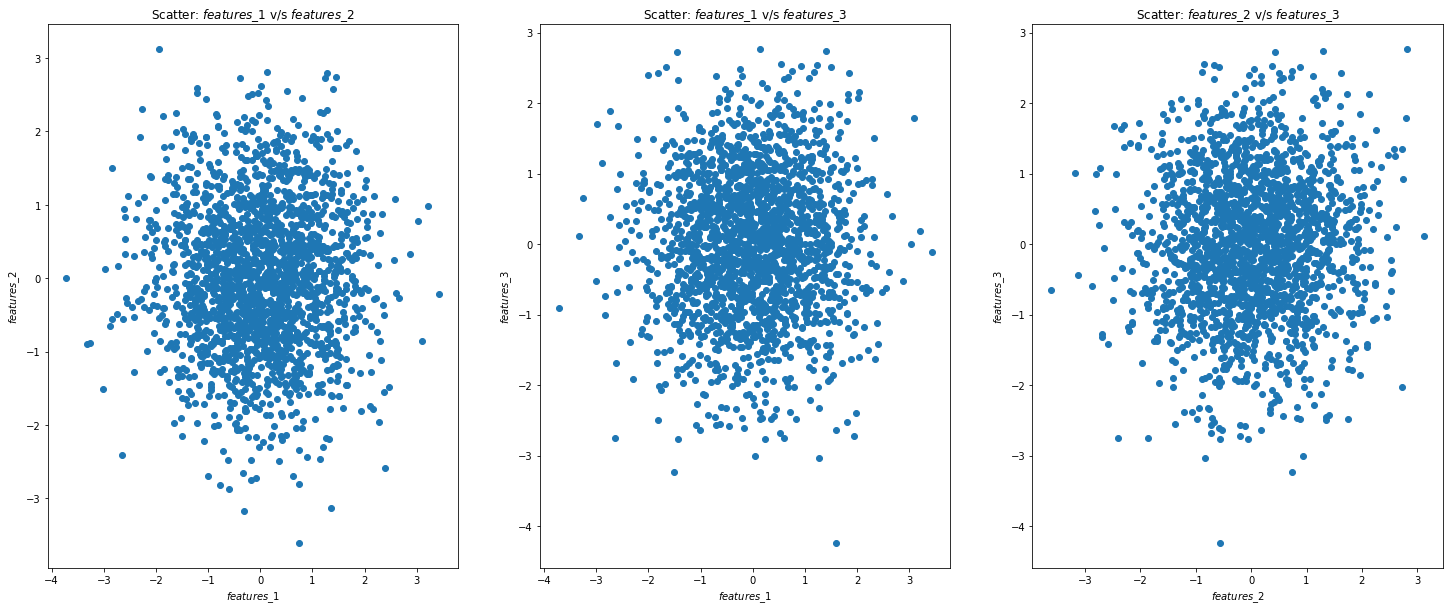

'\nThere is no significant correlation because the scatter plot is round and not strectched in any direction.\nThis conclusion is purely by observing the scatter plots.\n\n'

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('regression_generated.csv')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (25,10))

ax1.scatter(x=df['features_1'], y=df['features_2'])
ax1.set_title('Scatter: $features\_1$ v/s $features\_2$')
ax1.set_xlabel('$features\_1$')
ax1.set_ylabel('$features\_2$')

ax2.scatter(x=df['features_1'], y=df['features_3'])
ax2.set_title('Scatter: $features\_1$ v/s $features\_3$')
ax2.set_xlabel('$features\_1$')
ax2.set_ylabel('$features\_3$')

ax3.scatter(x=df['features_2'], y=df['features_3'])
ax3.set_title('Scatter: $features\_2$ v/s $features\_3$')
ax3.set_xlabel('$features\_2$')
ax3.set_ylabel('$features\_3$')

plt.show()

'''
There is no significant correlation because the scatter plot is round and not strectched in any direction.
This conclusion is purely by observing the scatter plots.

'''


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

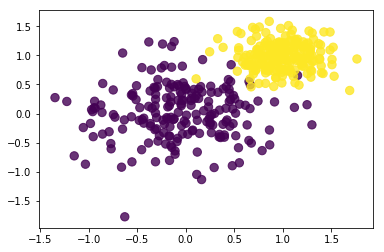

In [118]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

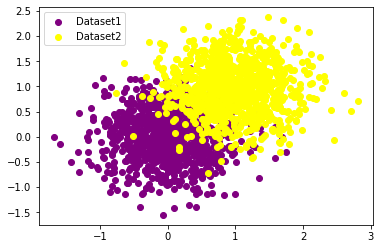

In [119]:
def generateDataset(mean, std):
    category1 = np.random.normal(mean, std, 1000)
    category2 = np.random.normal(mean,std,1000)
    dataset = np.column_stack((category1,category2))
    return dataset

dataset1 = generateDataset(0,0.5)
dataset2 = generateDataset(1.0,0.5)


fig_ds1, ax1 = plt.subplots()
ax1.scatter(dataset1[:,0],dataset1[:,1],c='purple',label = 'Dataset1')
ax1.scatter(dataset2[:,0],dataset2[:,1],c='yellow',label = 'Dataset2')
ax1.legend()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [120]:
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle

filename = 'data/residuals_261.pkl'
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

# Inspect the dataset, you'll find two variables (features)
print('\nDataset:',new_dict)

# Convert the content to a Pandas Dataframe
df = pd.DataFrame(new_dict.flatten()[0])
# print(df.loc[:,'residuals'])
df


Dataset: {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [121]:
# Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = df[abs(df['residuals']) < 2]
# print(df)

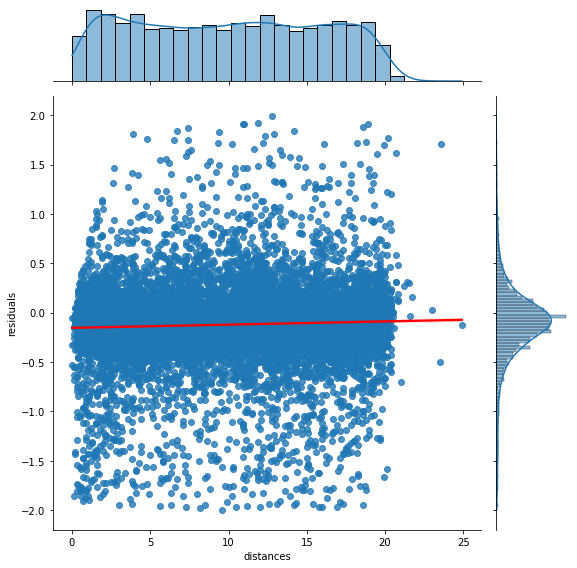

In [122]:
# Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
import seaborn as sns
sns.jointplot(x="distances", y="residuals", data=df, height = 8, kind = 'reg',joint_kws = {'line_kws':{'color':'red'}})



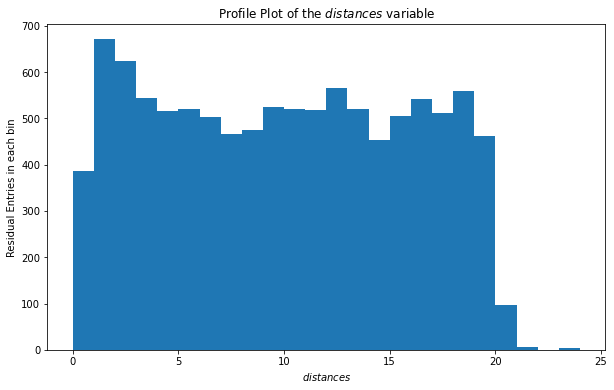

In [124]:
profile_fig = plt.figure(figsize=(10, 6)) # create the figure and the axes
x = df['distances']
h, bins, _ = plt.hist(x, bins=np.arange(x.min(),x.max())) # create and plot the histogram
# get the axes from the figure and pick the first (and only) element (beacuse there is only one axes)
ax = profile_fig.axes[0]
ax.set_title('Profile Plot of the $distances$ variable')
ax.set_xlabel('$distances$')
ax.set_ylabel('Residual Entries in each bin')
fig.tight_layout()

Text(0.5, 0, 'y')

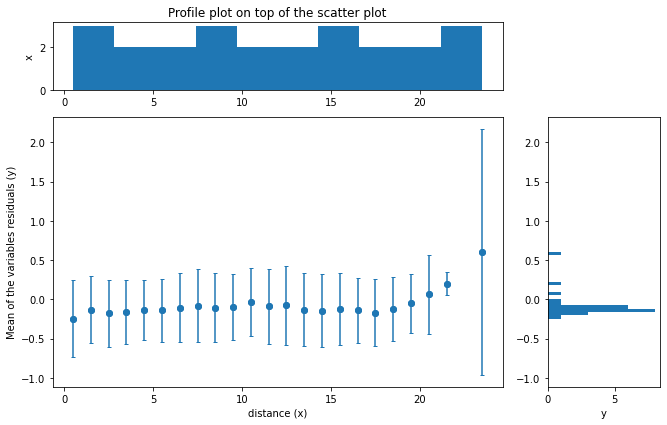

In [135]:
bin_centers = (bins[1:] + bins[:-1])/2
x = bin_centers
sliced_dataframes = [df.loc[(df['distances'] > i) & (df['distances'] < i+1)] for i in range(len(bins)-1)]
y = np.array([i['residuals'].mean() for i in residuals]) # mean of residuals
err_y = np.array([i['residuals'].std() for i in residuals]) #std deviation of the residuals


profile_fig2= plt.figure(figsize = (10,6))

ax = profile_fig2.add_gridspec(top=0.75, right=0.75).subplots()
ax.set_title('Profile plot on top of the scatter plot')
ax.set_xlabel('distance (x)')
ax.set_ylabel('Mean of the variables residuals (y)')
ax_histx = ax.inset_axes([0, 1.1, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.1, 0, 0.25, 1], sharey=ax)

ax.scatter(x,y)
ax.errorbar(x,
            y, 
            yerr=err_y, 
            fmt='o',
            capsize=2)


ax_histx.hist(x, bins=10)
ax_histy.hist(y, bins=20, orientation='horizontal')
ax_histx.set_ylabel('x')
ax_histy.set_xlabel('y')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/var/folders/nk/dz19pjd91h11_57f515xst040000gn/T/ipykernel_38173/174708845.py:15: RuntimeWarning: divide by zero encountered in true_divide
  poisson_uncertainty = 1/np.sqrt(h)


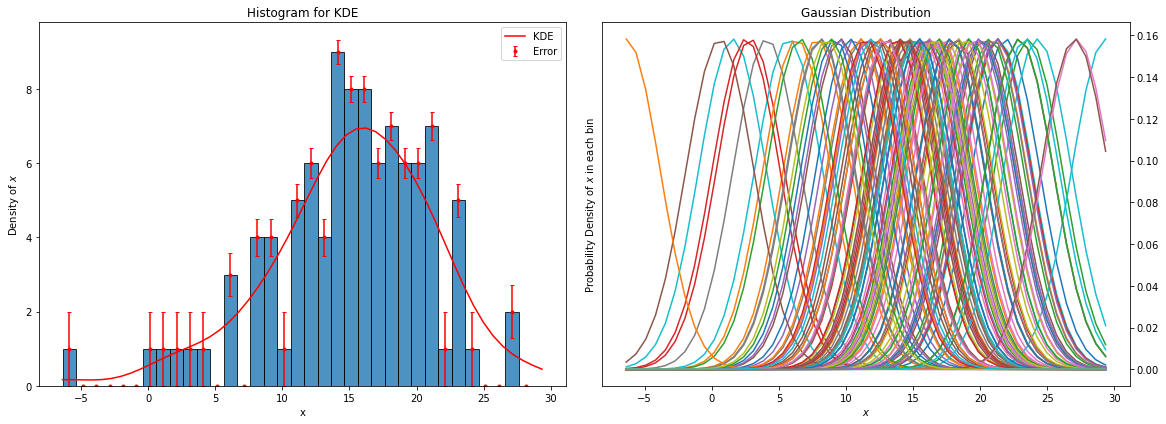

In [200]:
from scipy.stats import norm
import scipy.integrate
from matplotlib.ticker import MaxNLocator

np.random.seed(1234)
x = np.random.normal(15,6,100)

fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2, figsize = (16,6))
ax1.set_title('Histogram for KDE')
ax1.set_xlabel('x')
ax1.set_ylabel('Density of $x$')

h, bins, _ = ax1.hist(x, bins=np.arange(x.min(), x.max()),alpha = 0.8,edgecolor = 'black')
bin_centers = (bins[1:] + bins[:-1])/2
poisson_uncertainty = 1/np.sqrt(h)

#The errorbar
ax1.errorbar(
    x=bin_centers, 
    y=h,     
    yerr=poisson_uncertainty, 
    fmt='r.',
    capsize = 2,
    label = 'Error'
    )

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

# standard deviation
std = 1.06 * x.std()* np.power(x.size,-1/5)
x_axis = np.linspace(x.min(),x.max())
gauss = np.array([norm.pdf(x_axis,i,std) for i in x])
gauss_sum = np.sum(gauss,axis = 0)

ax2.set_title('Gaussian Distribution')
ax2.set_xlabel('$x$')
ax2.set_ylabel('Probability Density of $x$ in each bin')
ax2.yaxis.tick_right()

for distribution in gauss:
    ax2.plot(x_axis,distribution)

integral = scipy.integrate.trapz(gauss_sum, x_axis)
gauss_sum = gauss_sum * (len(x) / integral)
ax1.plot(x_axis, gauss_sum, color='red', label = 'KDE')

ax1.legend()